In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
df = pd.read_csv('drug200.csv', delimiter=',')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
print(df['Drug'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'Na_to_K'}>,
        <AxesSubplot:title={'center':'Drug'}>]], dtype=object)

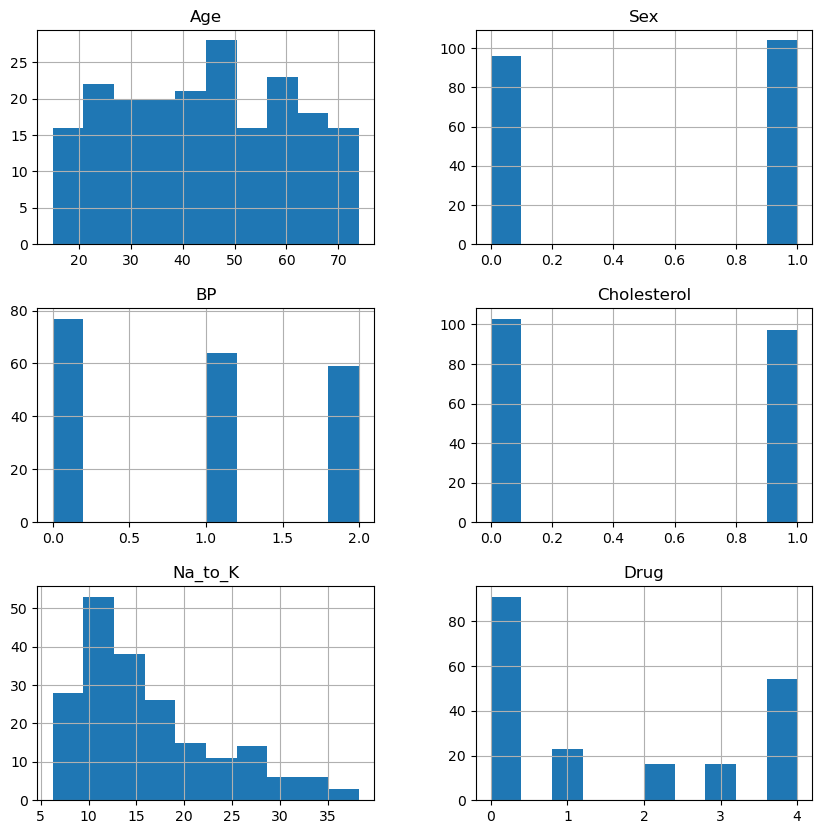

In [4]:
enc = LabelEncoder()
cdf = df
cdf['Drug'] = enc.fit_transform(df['Drug'])
cdf['Cholesterol'] = enc.fit_transform(df['Cholesterol'])
cdf['BP'] = enc.fit_transform(df['BP'])
cdf['Sex'] = enc.fit_transform(df['Sex'])

X = cdf[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = cdf['Drug'].values

cdf.hist(figsize=(10,10))

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (50, 5) (50,)
Test set: (150, 5) (150,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
k = 20
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))

for n in range (1,k):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

array([0.73333333, 0.68      , 0.64      , 0.66      , 0.71333333,
       0.71333333, 0.72      , 0.74      , 0.73333333, 0.74      ,
       0.7       , 0.66      , 0.65333333, 0.66666667, 0.65333333,
       0.64      , 0.62666667, 0.63333333, 0.64      ])

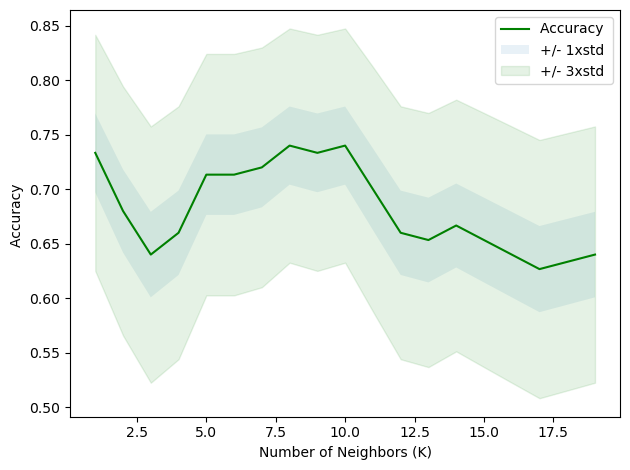

In [8]:
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,k),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [9]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.74 with k= 8
